In [ ]:
# Sao chép mã nguồn YOLOv7 về Yolov7_train mục
%cd /content/drive/MyDrive/YOLOV7_Train/
!git clone https://github.com/augmentedstartups/yolov7

/content/drive/MyDrive/YOLOV7_Train
Cloning into 'yolov7'...
remote: Enumerating objects: 597, done.
remote: Total 597 (delta 0), reused 0 (delta 0), pack-reused 597
Receiving objects: 100% (597/597), 50.95 MiB | 16.73 MiB/s, done.
Resolving deltas: 100% (293/293), done.
Checking out files: 100% (102/102), done.


In [ ]:
#kết nối tới drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Cài đặt các thư viện cần thiết để train YOLOv7
%cd /content/drive/MyDrive/YOLOV7_Train/yolov7/
!pip install -r requirements.txt

In [ ]:
# Tải weight pretrain về để nhận diện thử
%cd /content/drive/MyDrive/YOLOV7_Train/yolov7/
!mkdir pretrain
!git clone https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt


/content/drive/MyDrive/YOLOV7_Train/yolov7
Cloning into 'yolov7.pt'...
remote: Not Found
fatal: repository 'https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt/' not found


In [ ]:
# Giải nén dữ liệu đê train model
%cd /content/drive/MyDrive/YOLOV7_Train/
!mkdir train_data
%cd train_data
!unzip ../firedata.zip


In [ ]:
# Tổ chức lại thư mục train. Lý do: Vì YOLOv7 yêu cầu
# train
#   - images
#   - labels

%cd /content/drive/MyDrive/YOLOV7_Train/train_data
!mkdir train
!mkdir train/images
!mkdir train/labels
!mv *.jpg train/images
!mv *.txt train/labels

/content/drive/MyDrive/YOLOV7_Train/train_data


In [ ]:
# Khai báo 1 file yaml để YOLOv7 biết:
# - Đường dẫn đến thư mục train, test (nếu có, nếu không thì dùng luôn đường dẫn đến train)
# - Số lượng class qua biến nc (number of class)
# - Tên của các class
%cd /content/drive/MyDrive/YOLOV7_Train/yolov7
!rm data/mydataset.yaml # nếu có
!echo 'train: ../train_data/train' >> data/mydataset.yaml
!echo 'val: ../train_data/train' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo "names: ['fire']" >> data/mydataset.yaml

/content/drive/MyDrive/YOLOV7_Train/yolov7
rm: cannot remove 'data/mydataset.yaml': No such file or directory


In [ ]:
# Train model YOLOv7 với dữ liệu fire

%cd /content/drive/MyDrive/YOLOV7_Train/yolov7
!python train.py --batch 8 --cfg cfg/training/yolov7.yaml --epochs 200 --data data/mydataset.yaml --weights 'pretrain/yolov7.pt'

/content/drive/MyDrive/YOLOV7_Train/yolov7
YOLOR 🚀 v0.1-104-g941b94c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='data/mydataset.yaml', device='', entity=None, epochs=200, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, weights='pretrain/yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=

In [ ]:
# Tải ảnh sample từ internet
%cd /content/drive/MyDrive/YOLOV7_Train/yolov7
!mkdir test_images
%cd test_images
!wget https://cdn.theculturetrip.com/wp-content/uploads/2017/11/15271255494_fcc90d3f9b_k.jpg
!wget https://cdnimgen.vietnamplus.vn/t620/uploaded/wbxx/2020_05_13/85896_3585300525545474_a1.jpg
!wget https://media-cdn-v2.laodong.vn/Storage/NewsPortal/2020/4/22/800234/Chay-Pho-Co-9.jpg
!wget https://i-vnexpress.vnecdn.net/2019/03/23/chay-1-3737-1553317413.jpg


[Errno 2] No such file or directory: '/content/drive/MyDrive/YOLOV7_Train/yolov7'
/content
/content/test_images
--2022-09-17 13:21:16--  https://cdn.theculturetrip.com/wp-content/uploads/2017/11/15271255494_fcc90d3f9b_k.jpg
Resolving cdn.theculturetrip.com (cdn.theculturetrip.com)... 54.192.150.32, 54.192.150.125, 54.192.150.44, ...
Connecting to cdn.theculturetrip.com (cdn.theculturetrip.com)|54.192.150.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 697019 (681K) [image/jpeg]
Saving to: ‘15271255494_fcc90d3f9b_k.jpg’

15271255494_fcc90d3 100%[===================>] 680.68K  --.-KB/s    in 0.04s   

2022-09-17 13:21:16 (17.7 MB/s) - ‘15271255494_fcc90d3f9b_k.jpg’ saved [697019/697019]

--2022-09-17 13:21:16--  https://cdnimgen.vietnamplus.vn/t620/uploaded/wbxx/2020_05_13/85896_3585300525545474_a1.jpg
Resolving cdnimgen.vietnamplus.vn (cdnimgen.vietnamplus.vn)... 113.164.27.53
Connecting to cdnimgen.vietnamplus.vn (cdnimgen.vietnamplus.vn)|113.164.27.53|:443

In [ ]:
#Nhận diện thử Lửa với weights vừa train sau 200 epochs
%cd /content/drive/MyDrive/YOLOV7_Train/yolov7
!python detect.py --weights /content/drive/MyDrive/YOLOV7_Train/yolov7/runs/train/exp/weights/last.pt --source test_images/Chay-Pho-Co-9.jpg

/content/drive/MyDrive/YOLOV7_Train/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='test_images/Chay-Pho-Co-9.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/YOLOV7_Train/yolov7/runs/train/exp/weights/last.pt'])
YOLOR 🚀 v0.1-104-g941b94c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp

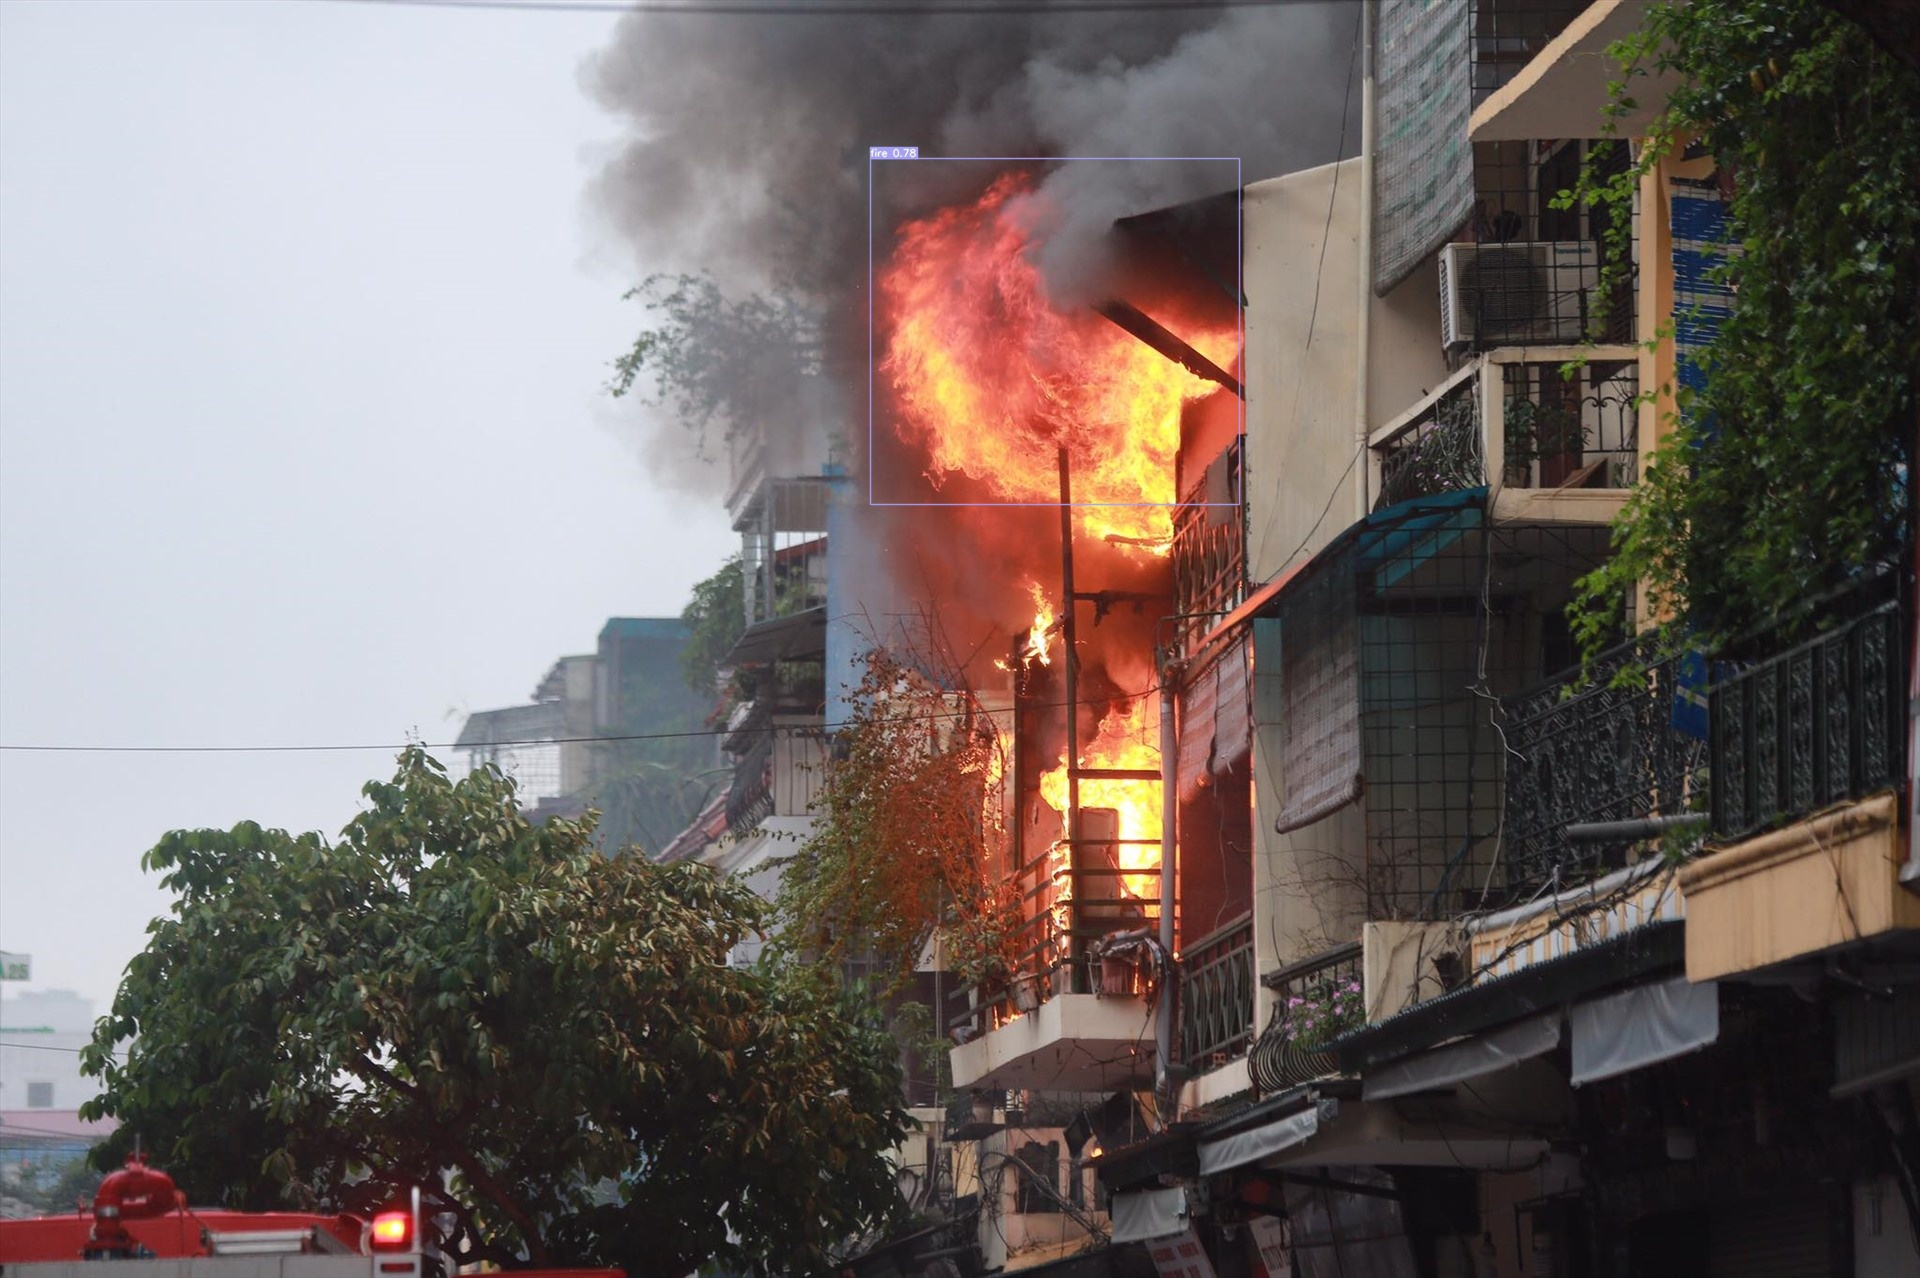

In [ ]:
# Xem ảnh đã nhận diện
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/YOLOV7_Train/yolov7/runs/detect/exp21/Chay-Pho-Co-9.jpg"))

In [ ]:

#cho phép chúng ta làm việc với các tập tin và thư mục.
import os
import sys
sys.path.append('/content/gdrive/MyDrive/yolov7')

 #là một thư viện có sẵn trong Python dùng để viết CLI. 
 #Khi viết, chương trình của bạn sẽ định nghĩa các tham số cần thiết và argparse sẽ tìm cách truyền các tham số đó từ sys.argv.
import argparse
import time
from pathlib import Path
import cv2
import torch
import numpy as np
import torch.backends.cudnn as cudnn
from numpy import random
from models.experimental import attempt_load
from utils.datasets import LoadStreams, LoadImages
from utils.general import check_img_size, check_requirements, check_imshow, non_max_suppression, apply_classifier, \
    scale_coords, xyxy2xywh, strip_optimizer, set_logging, increment_path
from utils.plots import plot_one_box
from utils.torch_utils import select_device, load_classifier, time_synchronized, TracedModel

In [ ]:
def letterbox(img, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
   # Thay đổi kích thước và đệm hình ảnh trong khi đáp ứng các ràng buộc nhiều bước
    shape = img.shape[:2]  
    if isinstance(new_shape, int):#kiểm tra xem môt đối tượng (tham số thứ nhất) là một instance hay là một lớp con của Classinfo (tham số thứ hai).
        new_shape = (new_shape, new_shape)

  # Tỷ lệ tỷ lệ (mới / cũ)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # chỉ giảm quy mô, không tăng quy mô (để kiểm tra mAP tốt hơn)
        r = min(r, 1.0)

   
# Lớp đệm máy tính
    ratio = r, r  # tỷ lệ chiều rộng, chiều cao
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  
# hình chữ nhật tối thiểu
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill: # căng ra
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0] # tỷ lệ chiều rộng, chiều cao

    dw /= 2 # chia đệm thành 2 bên
    dh /= 2

    if shape[::-1] != new_unpad: # thay đổi kích thước
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return img, ratio, (dw, dh)

In [ ]:
classes_to_filter = None  # Bạn có thể cung cấp danh sách các lớp để lọc theo tên,
source_image_path = "/content/drive/MyDrive/YOLOV7_Train/yolov7/test_images/Chay-Pho-Co-9.jpg"

opt  = {
    
    "weights": "/content/drive/MyDrive/YOLOV7_Train/yolov7/runs/train/exp/weights/last.pt", # Đường dẫn đến trọng số của tệp trọng số mặc định dành cho mô hình
    "yaml"   : "/content/drive/MyDrive/YOLOV7_Train/yolov7/data/mydataset.yaml",
    "img-size": 640, # kích thước hình ảnh mặc định
    "conf-thres": 0.1,# ngưỡng tin cậy để suy luận.
    "iou-thres" : 0.45, # NMS IoU ngưỡng cho suy luận.
    "device" : '0',  # thiết bị để chạy mô hình của chúng tôi, tức là 0 hoặc 0,1,2,3 hoặc cpu
    "classes" : classes_to_filter # danh sách các lớp để lọc hoặc Không có

}

In [ ]:
# khởi tạo mô hình và thiết lập nó để suy luận
with torch.no_grad():
  weights, imgsz = opt['weights'], opt['img-size']
  set_logging()
  device = select_device(opt['device'])
  half = device.type != 'cpu'
  model = attempt_load(weights, map_location=device)  # tải mô hình FP32
  stride = int(model.stride.max())  # người mẫu sải bước
  imgsz = check_img_size(imgsz, s=stride) # kiểm tra img_size
  if half:
    model.half()

  names = model.module.names if hasattr(model, 'module') else model.names
  colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]
  if device.type != 'cpu':
    model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))# chạy một lần

  img0 = cv2.imread(source_image_path)
  img = letterbox(img0, imgsz, stride=stride)[0]
  img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
  img = np.ascontiguousarray(img)#Trả về một mảng liền kề 
  img = torch.from_numpy(img).to(device) #Chuyển đổi mảng numpy thành tensor trên GPU
  img = img.half() if half else img.float()  # uint8 đến fp16 / 32
  img /= 255.0  # 0 - 255 to 0.0 - 1.0
  if img.ndimension() == 3:
    img = img.unsqueeze(0)#Thêm 1 chiều với dim bằng 0 cho Tensor

  # Sự suy luận
  t1 = time_synchronized()
  pred = model(img, augment= False)[0]

 # Áp dụng NMS
  classes = None
  if opt['classes']:
    classes = []
    for class_name in opt['classes']:

      classes.append(opt['classes'].index(class_name))


  pred = non_max_suppression(pred, opt['conf-thres'], opt['iou-thres'], classes= classes, agnostic= False)
  t2 = time_synchronized()
  for i, det in enumerate(pred):
    s = ''
    s += '%gx%g ' % img.shape[2:]  # print string
    gn = torch.tensor(img0.shape)[[1, 0, 1, 0]]
    if len(det):
      det[:, :4] = scale_coords(img.shape[2:], det[:, :4], img0.shape).round()

      for c in det[:, -1].unique():
        n = (det[:, -1] == c).sum()  # phát hiện cho mỗi lớp
        s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # thêm vào chuỗi
    
      for *xyxy, conf, cls in reversed(det):

        label = f'{names[int(cls)]} {conf:.2f}'
        plot_one_box(xyxy, img0, label=label, color=colors[int(cls)], line_thickness=3)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


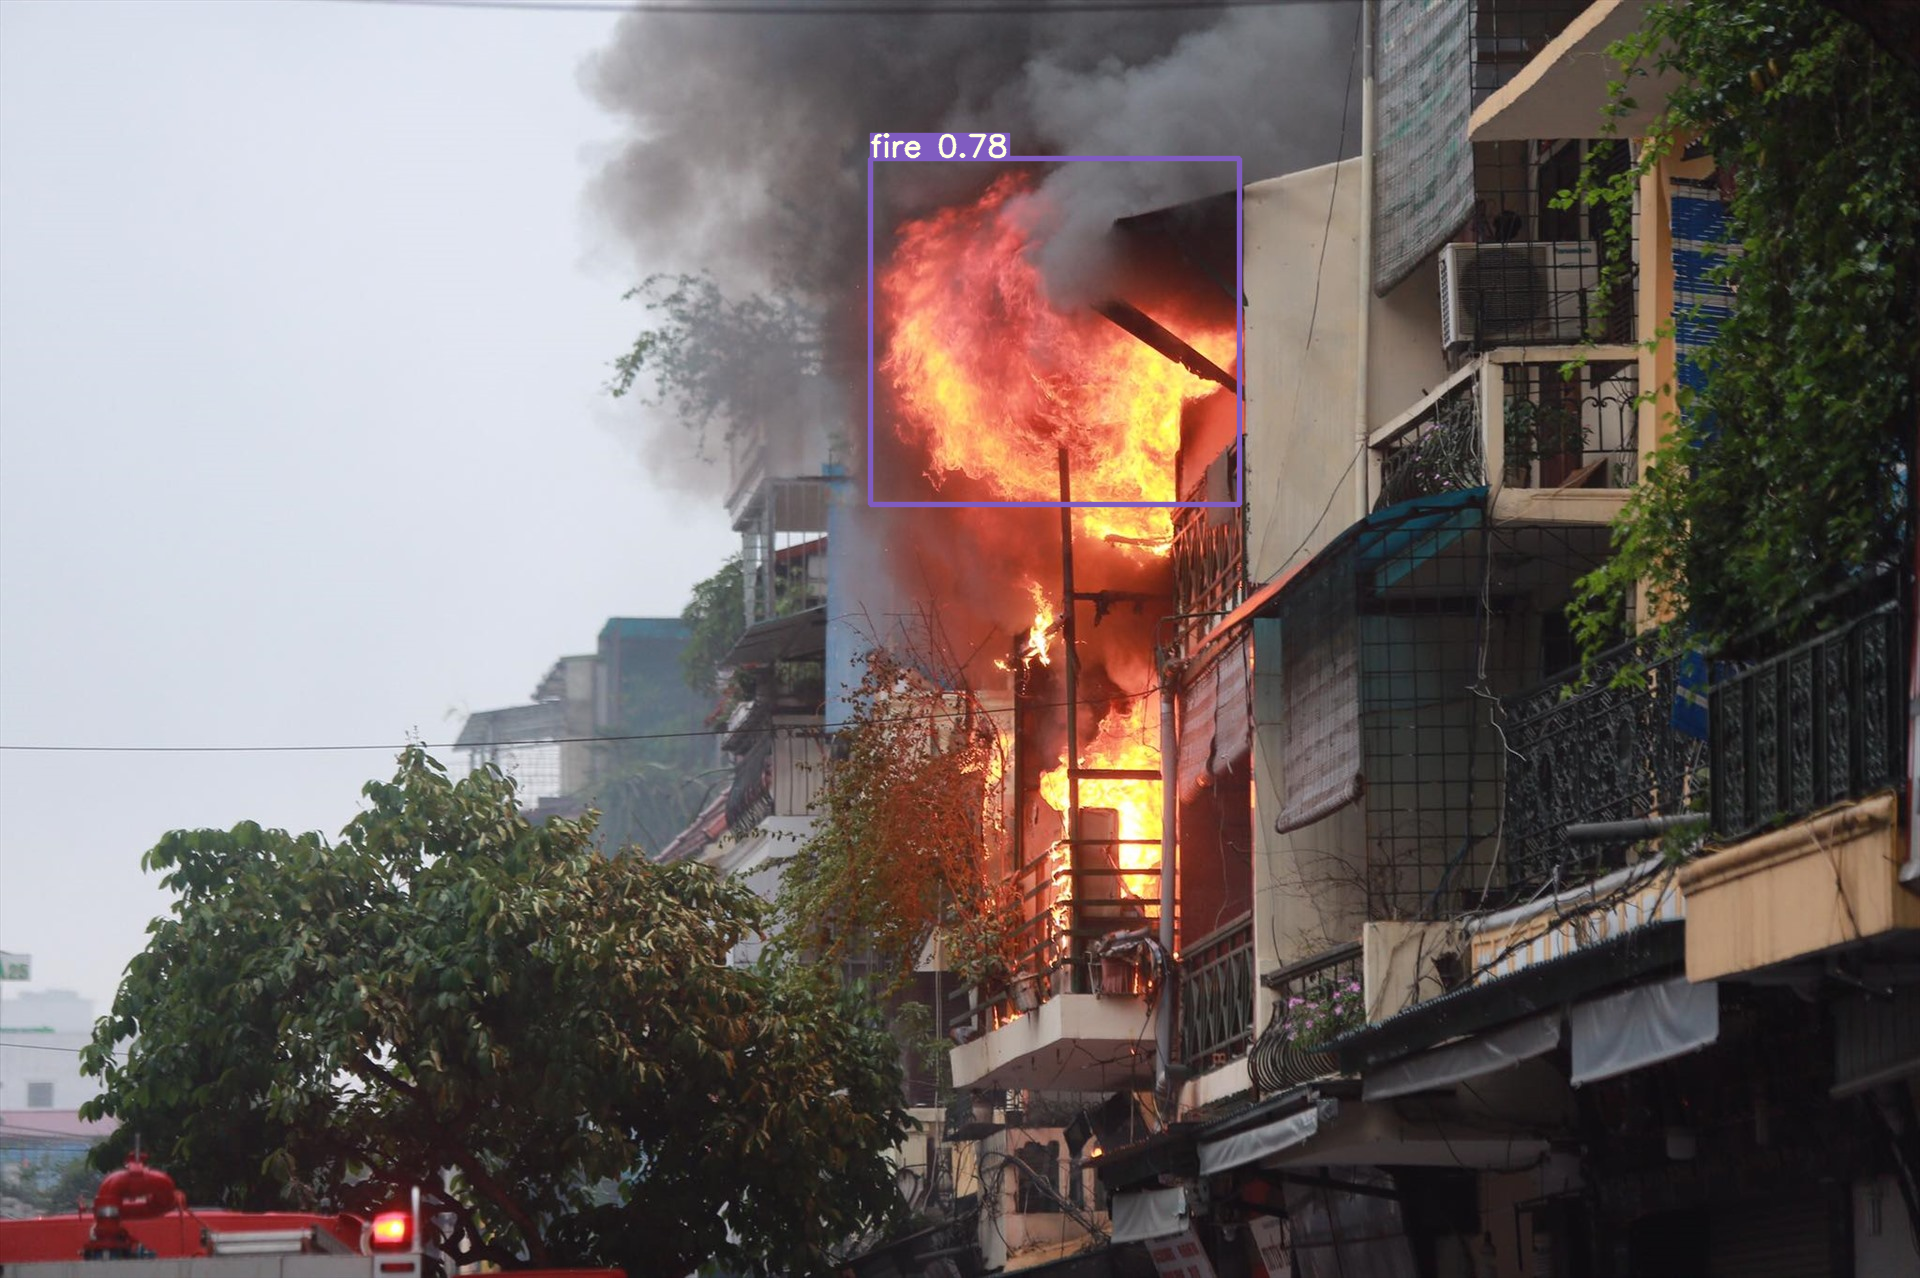

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img0)

In [ ]:
%cd /content/drive/MyDrive/YOLOV7_Train/yolov7
!mkdir test_video
%cd test_video
from google.colab import files
uploaded =files.upload()

/content/drive/MyDrive/YOLOV7_Train/yolov7
mkdir: cannot create directory ‘test_video’: File exists
/content/drive/MyDrive/YOLOV7_Train/yolov7/test_video


Saving chay1.mp4 to chay1.mp4


In [ ]:
video_path="/content/drive/MyDrive/YOLOV7_Train/yolov7/test_video/chay1.mp4"


In [ ]:
# khởi tạo đối tượng video
video=cv2.VideoCapture(video_path)

# thông tin video
fps=video.get(cv2.CAP_PROP_FPS)
w=int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
h =int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
nframes=int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# khởi tạo đối tượng để ghi đầu ra video
output=cv2.VideoWriter('output.mp4',cv2.VideoWriter_fourcc(*'DIVX'),fps,(w,h))
torch.cuda.empty_cache()
# khởi tạo mô hình và thiết lập nó để suy luận
with torch.no_grad():
  weights, imgsz = opt['weights'], opt['img-size']
  set_logging()
  device = select_device(opt['device'])
  half = device.type != 'cpu'
  model = attempt_load(weights, map_location=device)  # load FP32 model
  stride = int(model.stride.max())  # model stride
  imgsz = check_img_size(imgsz, s=stride)  # check img_size
  if half:
    model.half()

  names = model.module.names if hasattr(model, 'module') else model.names
  colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]

  if device.type != 'cpu':
    model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))
  
  classes = None
  if opt['classes']:
    classes = []
    for class_name in opt['classes']:

      classes.append(opt['classes'].index(class_name))
  for j in range(nframes):
      ret,img0= video.read()
      if ret:
        img = letterbox(img0, imgsz, stride=stride)[0]
        img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
        img = np.ascontiguousarray(img)
        img = torch.from_numpy(img).to(device)
        img = img.half() if half else img.float()  # uint8 to fp16/32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0
        if img.ndimension() == 3:
         img = img.unsqueeze(0)

        # Inference
        t1 = time_synchronized()
        pred = model(img, augment= False)[0]
        pred = non_max_suppression(pred, opt['conf-thres'], opt['iou-thres'], classes= classes, agnostic= False)
        t2 = time_synchronized()
        for i, det in enumerate(pred):
          s = ''
          s += '%gx%g ' % img.shape[2:]  # print string
          gn = torch.tensor(img0.shape)[[1, 0, 1, 0]]
          if len(det):
            det[:, :4] = scale_coords(img.shape[2:], det[:, :4], img0.shape).round()

            for c in det[:, -1].unique():
              n = (det[:, -1] == c).sum()  # detections per class
              s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
            for *xyxy, conf, cls in reversed(det):

              label = f'{names[int(cls)]} {conf:.2f}'
              plot_one_box(xyxy, img0, label=label, color=colors[int(cls)], line_thickness=3)
        print(f"{j+1} /{nframes} frames processed")
        output.write(img0)
      else:
        break
output.release()
video.release()



Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
1 /414 frames processed
2 /414 frames processed
3 /414 frames processed
4 /414 frames processed
5 /414 frames processed
6 /414 frames processed
7 /414 frames processed
8 /414 frames processed
9 /414 frames processed
10 /414 frames processed
11 /414 frames processed
12 /414 frames processed
13 /414 frames processed
14 /414 frames processed
15 /414 frames processed
16 /414 frames processed
17 /414 frames processed
18 /414 frames processed
19 /414 frames processed
20 /414 frames processed
21 /414 frames processed
22 /414 frames processed
23 /414 frames processed
24 /414 frames processed
25 /414 frames processed
26 /414 frames processed
27 /414 frames processed
28 /414 frames processed
29 /414 frames processed
30 /414 frames processed
31 /414 frames processed
32 /414 frames processed
33 /414 frames processed
34 /414 frames processed
35 /414 frames processed
36 /414 frames processed


In [ ]:
# nhập phần phụ thuộc
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import PIL
import io
import html
# hàm để chuyển đổi đối tượng JavaScript thành hình ảnh OpenCV
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # giải mã hình ảnh base64
  image_bytes = b64decode(js_reply.split(',')[1])
  
# chuyển đổi byte thành mảng numpy
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # giải mã mảng numpy thành hình ảnh OpenCV BGR
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img


# hàm để chuyển đổi hình ảnh hộp giới hạn Hình chữ nhật OpenCV thành chuỗi byte base64 để được phủ trên luồng video
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """

# chuyển đổi mảng thành hình ảnh PIL
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # định dạng bbox thành png để trả lại
  bbox_PIL.save(iobuf, format='png')
 
# chuỗi trả về định dạng
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes



# JavaScript để tạo đúng luồng video trực tiếp của chúng tôi bằng cách sử dụng webcam làm đầu vào
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"},
          deviceId: 0
          });
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# bắt đầu phát trực tuyến video từ webcam
video_stream()

# nhãn cho video
label_html = 'Capturing...'
# hộp giới hạn khởi tạo để trống
bbox = ''
count = 0 

with torch.no_grad():
  weights, imgsz = opt['weights'], (480,640)
  set_logging()
  device = select_device(opt['device'])
  half = device.type != 'cpu'
  model = attempt_load(weights, map_location=device)  # load FP32 model
  stride = int(model.stride.max())  # model stride

  if half:
    model.half()

  names = model.module.names if hasattr(model, 'module') else model.names
  colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]
  if device.type != 'cpu':
    model(torch.zeros(1, 3, imgsz[0], imgsz[1]).to(device).type_as(next(model.parameters())))
  classes = None
  if opt['classes']:
    classes = []
    for class_name in opt['classes']:
      classes.append(opt['classes'].index(class_name))
  
  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break
    
    img0 = js_to_image(js_reply["img"])
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    img = letterbox(img0, imgsz, stride=stride)[0]
    img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
    img = np.ascontiguousarray(img)
    img = torch.from_numpy(img).to(device)
    img = img.half() if half else img.float()  # uint8 to fp16/32
    img /= 255.0  # 0 - 255 to 0.0 - 1.0
    if img.ndimension() == 3:
      img = img.unsqueeze(0)

    # Inference
    t1 = time_synchronized()
    pred = model(img, augment= False)[0]

    # Apply NMS
    pred = non_max_suppression(pred, opt['conf-thres'], opt['iou-thres'], classes= classes, agnostic= False)
    t2 = time_synchronized()
    for i, det in enumerate(pred):
      s = ''
      s += '%gx%g ' % img.shape[2:]  # print string
      gn = torch.tensor(img0.shape)[[1, 0, 1, 0]]
      if len(det):
        det[:, :4] = scale_coords(img.shape[2:], det[:, :4], img0.shape).round()

        for c in det[:, -1].unique():
          n = (det[:, -1] == c).sum()  # detections per class
          s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
    
        for *xyxy, conf, cls in reversed(det):

          label = f'{names[int(cls)]} {conf:.2f}'
          plot_one_box(xyxy, bbox_array, label=label, color=colors[int(cls)], line_thickness=3)
    
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    bbox_bytes = bbox_to_bytes(bbox_array)
    
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
